In [2]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
images=[]
labels=[]
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

In [4]:
data_dir = '/home/aayush/SudokuSolver/Data/MNISTDATA/'

In [5]:
image_size=(28,28)

In [6]:
counter=0
for digitn in os.listdir(data_dir):
    for image in os.listdir(data_dir+digitn):
        digit_image=cv2.imread(data_dir+digitn+'/'+image)
        gray_img = cv2.cvtColor(digit_image, cv2.COLOR_BGR2GRAY)
        gray_img = cv2.resize(gray_img, image_size)
        small_img = cv2.resize(gray_img,image_size)
        images.append(np.asarray(list(small_img)).reshape(image_size))
        labels.append(int(digitn[-1]))
        counter+=1
        if (counter%1000==0):
          print("Total images Scanned : {}".format(counter))

Total images Scanned : 1000
Total images Scanned : 2000
Total images Scanned : 3000
Total images Scanned : 4000
Total images Scanned : 5000
Total images Scanned : 6000
Total images Scanned : 7000
Total images Scanned : 8000
Total images Scanned : 9000
Total images Scanned : 10000
Total images Scanned : 11000
Total images Scanned : 12000
Total images Scanned : 13000
Total images Scanned : 14000
Total images Scanned : 15000
Total images Scanned : 16000
Total images Scanned : 17000
Total images Scanned : 18000
Total images Scanned : 19000
Total images Scanned : 20000
Total images Scanned : 21000
Total images Scanned : 22000
Total images Scanned : 23000
Total images Scanned : 24000
Total images Scanned : 25000
Total images Scanned : 26000
Total images Scanned : 27000
Total images Scanned : 28000
Total images Scanned : 29000
Total images Scanned : 30000
Total images Scanned : 31000
Total images Scanned : 32000
Total images Scanned : 33000
Total images Scanned : 34000
Total images Scanned : 

In [7]:
data_dir = '/home/aayush/SudokuSolver/Data/74KData/'

In [8]:
counter=0
for digitn in os.listdir(data_dir):
    for image in os.listdir(data_dir+digitn):

        digit_image=cv2.imread(data_dir+digitn+'/'+image)
        gray_img = cv2.cvtColor(digit_image, cv2.COLOR_BGR2GRAY)
        gray_img = cv2.resize(gray_img, image_size)
        small_img = cv2.resize(gray_img,image_size)
        images.append(np.asarray(list(small_img)).reshape(image_size))
        labels.append(int(digitn[-1]))
        counter+=1
        if (counter%1000==0):
          print("Total images Scanned : {}".format(counter))

Total images Scanned : 1000
Total images Scanned : 2000
Total images Scanned : 3000
Total images Scanned : 4000
Total images Scanned : 5000
Total images Scanned : 6000
Total images Scanned : 7000
Total images Scanned : 8000
Total images Scanned : 9000
Total images Scanned : 10000
Total images Scanned : 11000
Total images Scanned : 12000
Total images Scanned : 13000
Total images Scanned : 14000
Total images Scanned : 15000
Total images Scanned : 16000
Total images Scanned : 17000
Total images Scanned : 18000
Total images Scanned : 19000
Total images Scanned : 20000
Total images Scanned : 21000
Total images Scanned : 22000
Total images Scanned : 23000
Total images Scanned : 24000
Total images Scanned : 25000
Total images Scanned : 26000
Total images Scanned : 27000
Total images Scanned : 28000
Total images Scanned : 29000
Total images Scanned : 30000
Total images Scanned : 31000
Total images Scanned : 32000
Total images Scanned : 33000
Total images Scanned : 34000
Total images Scanned : 

In [9]:
from numpy import asarray
from numpy import save

# define data
image_data = asarray(images)
label_data = asarray(labels)

# save to npy file
save('Processed_images20.npy', image_data)
save('Processed_labels20.npy', label_data)

In [10]:
pwd

'/home/aayush/SudokuSolver/Model Training'

In [11]:
# load numpy array from npy file
from numpy import load
# load array
loaded_image_data = load('Processed_images20.npy')
loaded_label_data = load('Processed_labels20.npy')
# print the array
print(loaded_image_data.shape)
print(loaded_label_data.shape)

(140693, 28, 28)
(140693,)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.20)

In [10]:
X_train=np.array(X_train)

In [11]:
X_train.shape

(56000, 28, 28)

In [12]:
Y_test=np.array(Y_test)

In [13]:
Y_train=np.array(Y_train)

In [14]:
Y_train=np.array(Y_train)

In [15]:
Y_train.shape

(56000,)

In [16]:
combined = list(zip(X_train, Y_train))

random.shuffle(combined)

X_train, Y_train = zip(*combined)

In [17]:
combined = list(zip(X_test, Y_test))

random.shuffle(combined)

X_test, Y_test = zip(*combined)

In [18]:
X_train=np.array(X_train)

In [19]:
Y_train=np.array(Y_train)

In [20]:
X_test=np.array(X_test)

In [21]:
Y_test=np.array(Y_test)

In [22]:
(X_train).shape

(56000, 28, 28)

In [31]:
X_train=1-X_train/255

In [23]:
X_train = X_train.reshape(56000,28,28,1)

In [24]:
(X_test).shape

(14000, 28, 28)

In [34]:
X_test=1-X_test/255

In [25]:
X_test.shape

(14000, 28, 28)

In [26]:
X_test = X_test.reshape(14000,28,28,1)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
Y_cat_train = to_categorical(Y_train,num_classes=10)
Y_cat_test = to_categorical(Y_test,num_classes=10)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [32]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
model.fit(X_train,Y_cat_train,epochs=30,validation_data=(X_test,Y_cat_test),callbacks=[early_stop])

Epoch 1/30
1750/1750 [==============================] - 125s 71ms/step - loss: 4.8080 - accuracy: 0.2830 - val_loss: 1.6368 - val_accuracy: 0.4364
Epoch 2/30
1750/1750 [==============================] - 126s 72ms/step - loss: 1.8804 - accuracy: 0.3877 - val_loss: 1.4549 - val_accuracy: 0.5217
Epoch 3/30
 554/1750 [========>.....................] - ETA: 1:27 - loss: 1.6675 - accuracy: 0.4405

KeyboardInterrupt: 

In [56]:
metrics = pd.DataFrame(model.history.history)

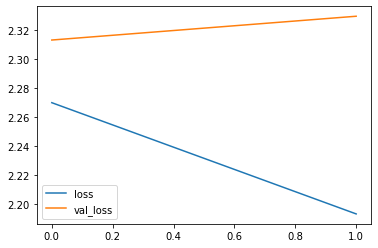

In [57]:
metrics[['loss','val_loss']].plot()

In [39]:
model.save('Digit_Model.h5')

In [42]:
import matplotlib.pyplot as plt

Test images shape: (4, 28, 28)
Predicted digit: 4
Predicted digit: 6
Predicted digit: 3
Predicted digit: 6


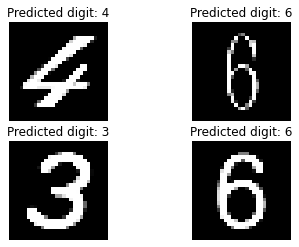

In [43]:
test_images = X_test[0:4]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))
for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)
    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))
plt.show()

In [46]:
from tensorflow.keras.datasets import mnist
import keras

In [47]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [48]:
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,num_classes=10)

In [49]:
x_train = x_train/255
x_test = x_test/255

In [50]:
x_train = x_train.reshape(60000,28,28,1)

In [51]:
x_test = x_test.reshape(10000,28,28,1)

In [52]:
model.fit(x_train,y_cat_train,epochs=11,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/11
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8499 - accuracy: 0.4755 - val_loss: 1.2138 - val_accuracy: 0.6033
Epoch 2/11
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2918 - accuracy: 0.5750 - val_loss: 0.9328 - val_accuracy: 0.7181
Epoch 3/11
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0860 - accuracy: 0.6445 - val_loss: 0.7678 - val_accuracy: 0.7702
Epoch 4/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9581 - accuracy: 0.6871 - val_loss: 0.6603 - val_accuracy: 0.8001
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8621 - accuracy: 0.7193 - val_loss: 0.5851 - val_accuracy: 0.8238
Epoch 6/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7942 - accuracy: 0.7412 - val_loss: 0.5310 - val_accuracy: 0.8402
Epoch 7/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7454 - accuracy: 0.7602 - val_loss: 0.4903 - val_accuracy:

In [53]:
metrics = pd.DataFrame(model.history.history)

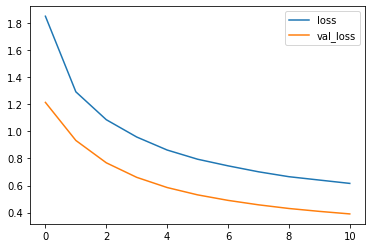

In [54]:
metrics[['loss','val_loss']].plot()

In [55]:
model.save('New_Digit_Model.h5')

Test images shape: (4, 28, 28)
Predicted digit: 7
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0


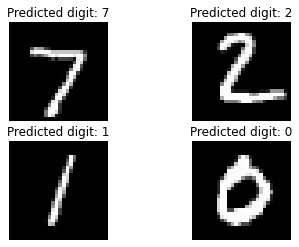

In [56]:
test_images = x_test[0:4]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))
for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)
    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))
plt.show()